# ANALISI DELLO SPETTRO LOCK-IN

## CI SIAMO PERSI QUALCOSA PER STRADA?

### Hack terribile

Aggiungiamo manualmente i possibili picchi mancanti individuati ad occhio

In [1]:
def aggiungi_possibili_picchi_mancanti(nu0s, gammas, dist):
    import numpy as np

    # assicurati che siano liste "piatte"
    nu0s   = list(np.atleast_1d(nu0s))
    gammas = list(np.atleast_1d(gammas))

    def cat(*parts):
        out = []
        for p in parts:
            if p is None:
                continue
            if isinstance(p, (list, tuple)):
                out.extend(p)
            elif hasattr(p, "tolist"):  # numpy array
                out.extend(p.tolist())
            else:  # scalare
                out.append(p)
        return out

    if dist == 1000:
        nu0s   = cat([2660], nu0s, [2895, 3100])
        gammas = cat([2],    gammas, [2, 2])

    if dist == 40:
        nu0s   = cat([2760], nu0s, [2970, 3130])
        gammas = cat([2],    gammas, [2, 2])
        

    if dist == 39:
        nu0s   = cat([2760], nu0s, [2970])
        gammas = cat([2],    gammas, [2])

    if dist == 33:
        nu0s   = cat([2740], nu0s, [2990])
        gammas = cat([2],    gammas, [2])

    if dist == 30:
        nu0s   = cat([2720], [nu0s[0]], [2822], nu0s[1:-1], [2891], [nu0s[-1]], [3000])
        gammas = cat([2], [gammas[0]], [2], gammas[1:-1], [2], [gammas[-1]], [2])

    if dist == 24:
        nu0s   = cat([nu0s[0]], [2788], nu0s[1:-1], [2936], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],  gammas[1:-1], [2],   [gammas[-1]])
        nu0s   = cat([2665], nu0s, [3060])
        gammas = cat([2],    gammas, [2])

    if dist == 22:
        nu0s   = cat([nu0s[0]], [2765], nu0s[1:-1], [2945], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],   gammas[1:-1], [2],   [gammas[-1]])
        nu0s   = cat([2640], nu0s, [3075])
        gammas = cat([2],    gammas, [2])

    if dist == 20:
        nu0s   = cat([nu0s[0]], [2730], nu0s[1:-1], [3005], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],   gammas[1:-1], [2],   [gammas[-1]])
        nu0s   = cat([2605], nu0s, [3130])
        gammas = cat([2],    gammas, [2])

    if dist == 19:
        nu0s   = cat([nu0s[0]], [2710], nu0s[1:-1], [3020], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],   gammas[1:-1], [2],   [gammas[-1]])
        nu0s   = cat([2585], nu0s, [3150])
        gammas = cat([2],    gammas, [2])

    if dist == 17:
        nu0s   = cat([nu0s[0]], [2655, 2730], [nu0s[1]], [2790], nu0s[2:-1], [nu0s[-1]])
        gammas = cat([gammas[0]], [5, 5],      [gammas[1]], [2],  gammas[2:-1], [gammas[-1]])
        nu0s   = cat([2525], nu0s, [3185])
        gammas = cat([2],    gammas, [2])

    return nu0s, gammas
        

### Codice originale con aggiunta della funzione correttiva

In [2]:
from odmr_subroutines.analysis_subroutines import *
from data.from_spectra_fit_results import nu0s, gammas

In [3]:
def make_N_derivate_lorentziane(N_deeps):
    def fit_function(nu, *params):
        result = 0
        for i in range(N_deeps):
            A = params[3*i]
            gamma = params[3*i + 1]
            nu0 = params[3*i + 2]
            # da metà del grafico il segno va invertito
            if nu0 > 2860:
                A = -A
            result += derivata_lorentziana(nu, A, gamma, nu0)
        return result
    return fit_function

In [4]:
def make_N_lorentziane(N_deeps):
    def fit_function(nu, *params):
        result = 0
        for i in range(N_deeps):
            A = params[3*i]
            gamma = params[3*i + 1]
            nu0 = params[3*i + 2]
            '''# da metà del grafico il segno va invertito
            if nu0 > 2860:
                A = -A'''
            result += lorentziana(nu, A, gamma, nu0, 0)
        return result
    return fit_function

In [5]:
max_a = -10

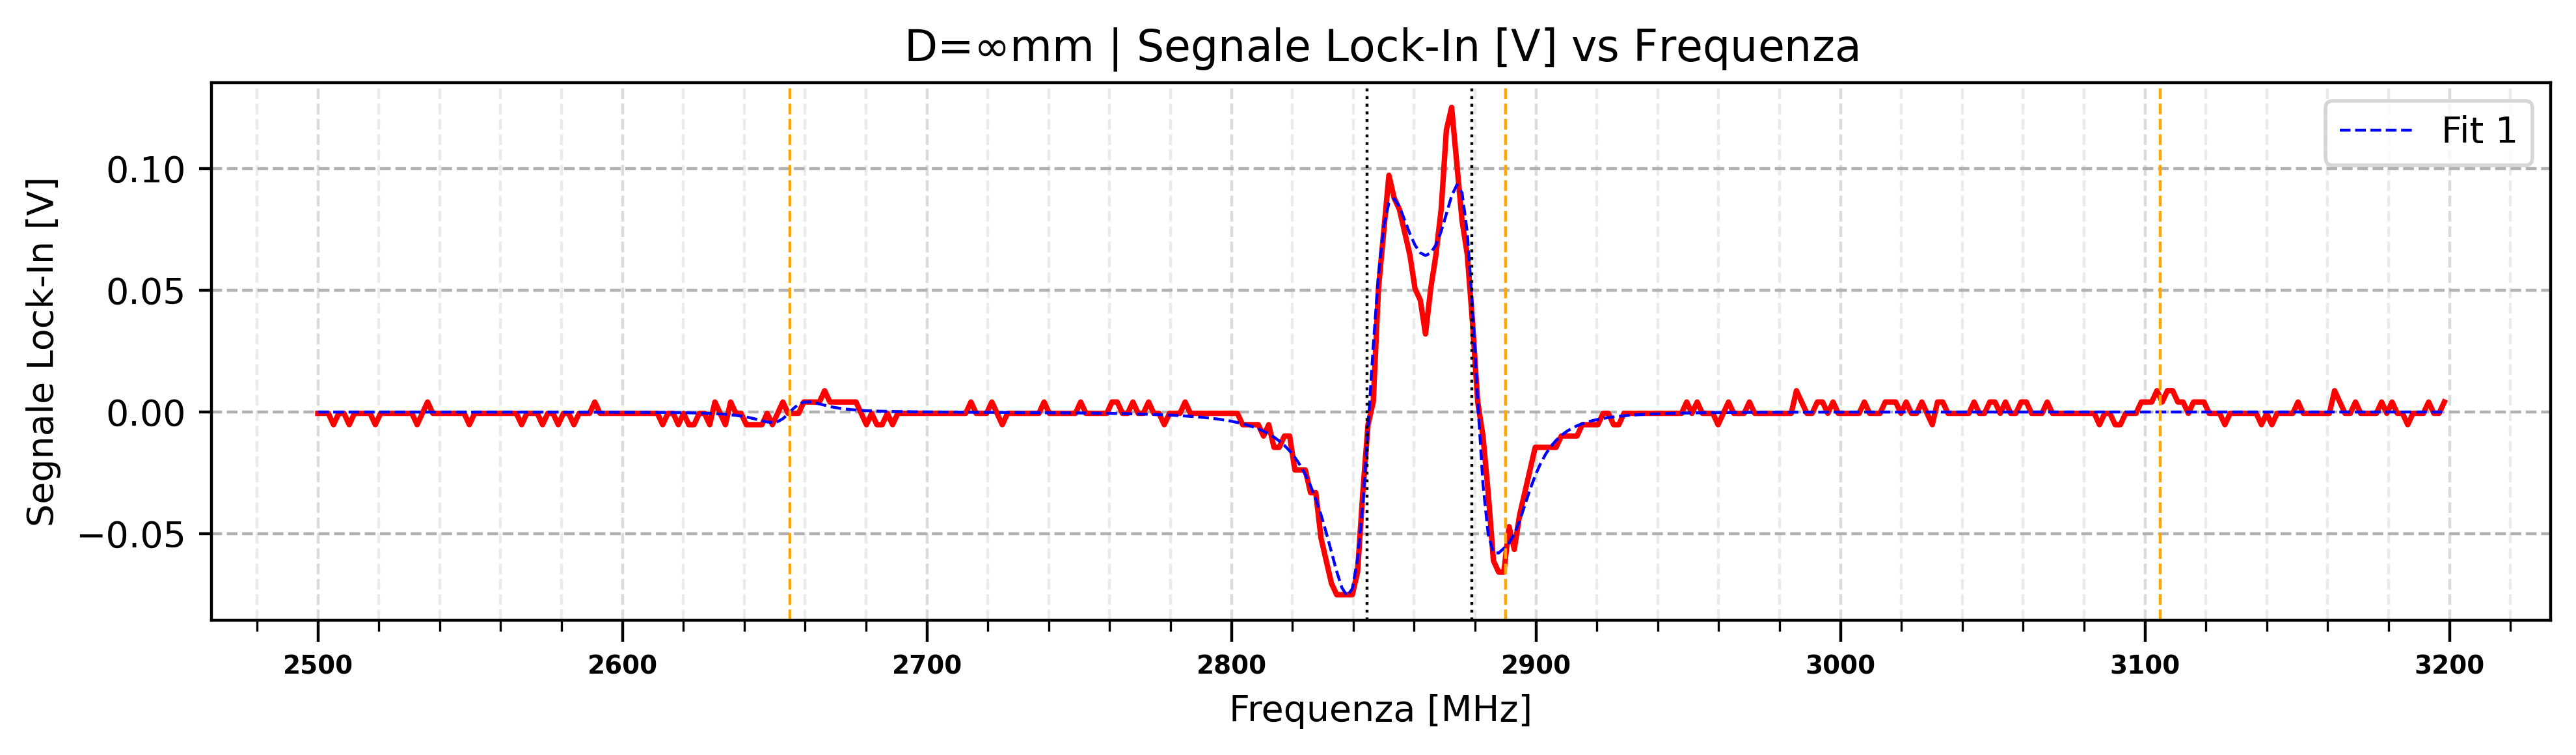

Centri:
  lockin    |    normal
2655.00001  |  ---
2845.44131  |  2844.55630
2880.29315  |  2879.00423
2890.00000  |  ---
3105.00000  |  ---


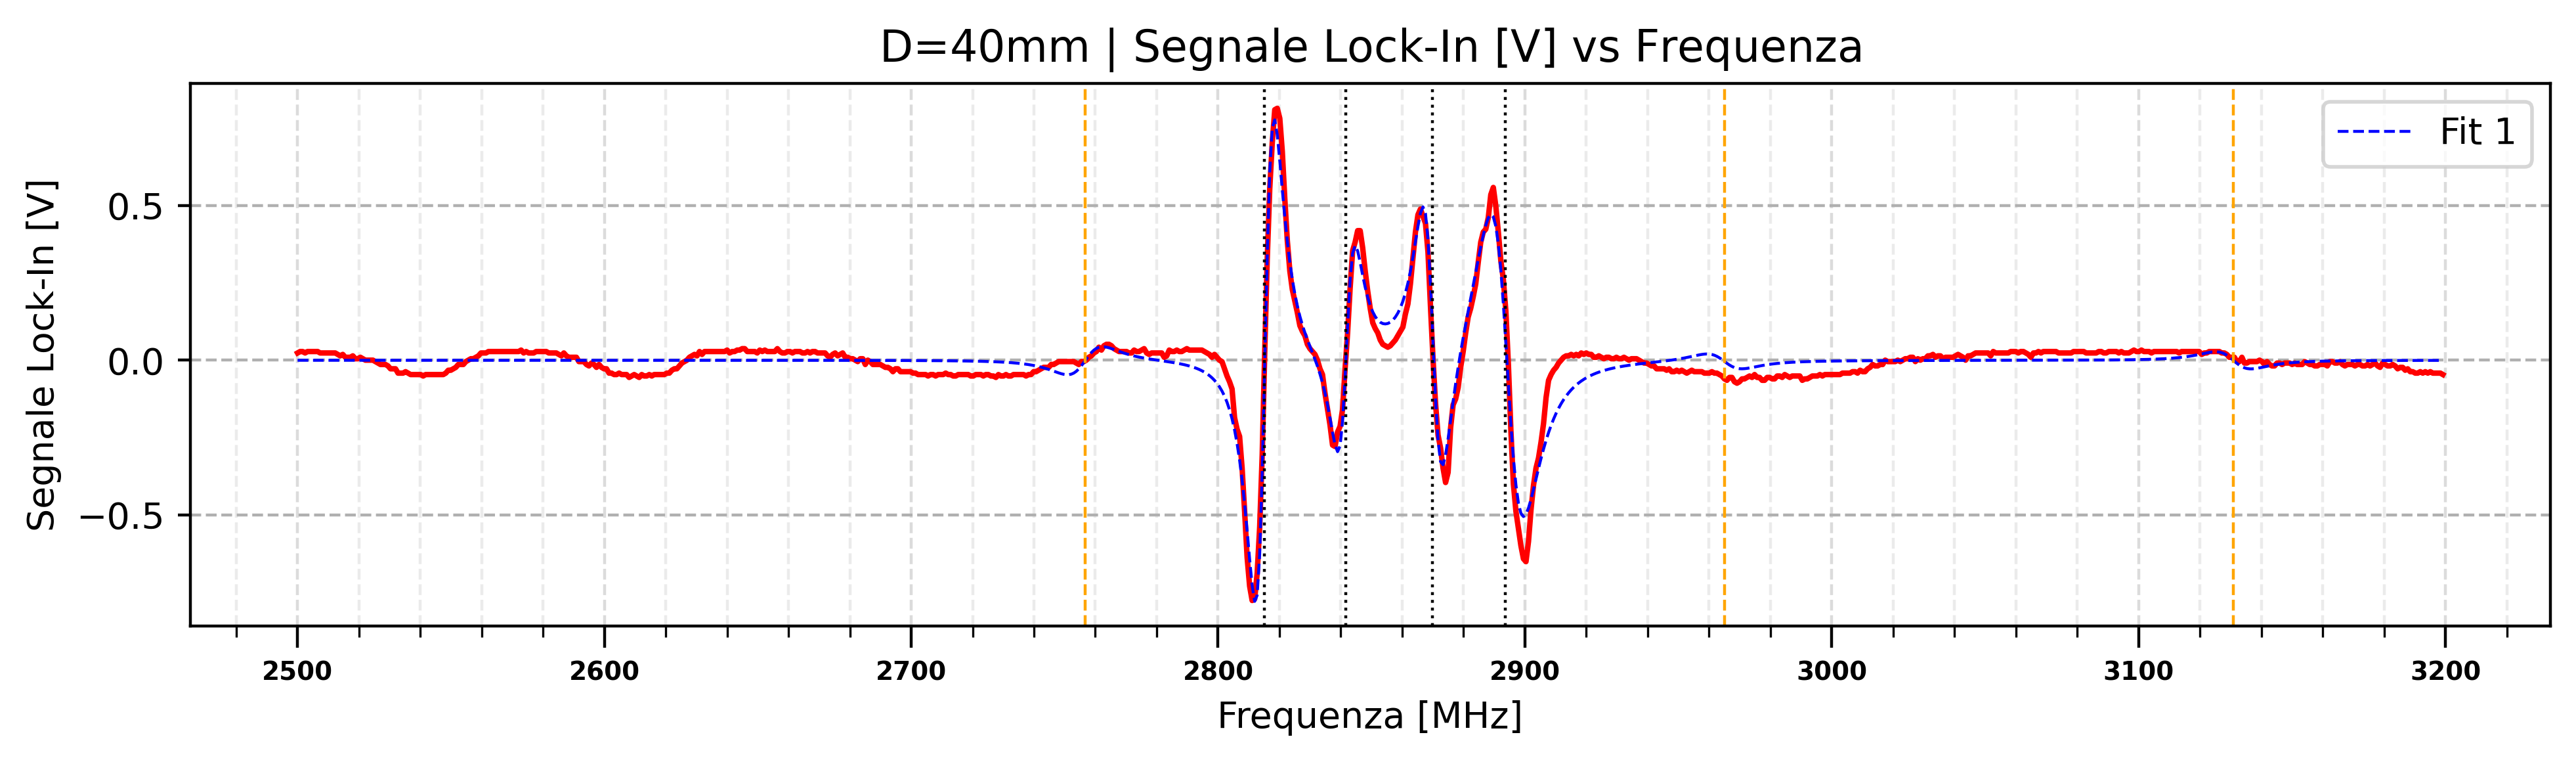

Centri:
  lockin    |    normal
2756.66865  |  ---
2815.23351  |  2815.08272
2841.84395  |  2841.71268
2869.99382  |  2869.78206
2894.21674  |  2893.69407
2965.00000  |  ---
3130.88128  |  ---


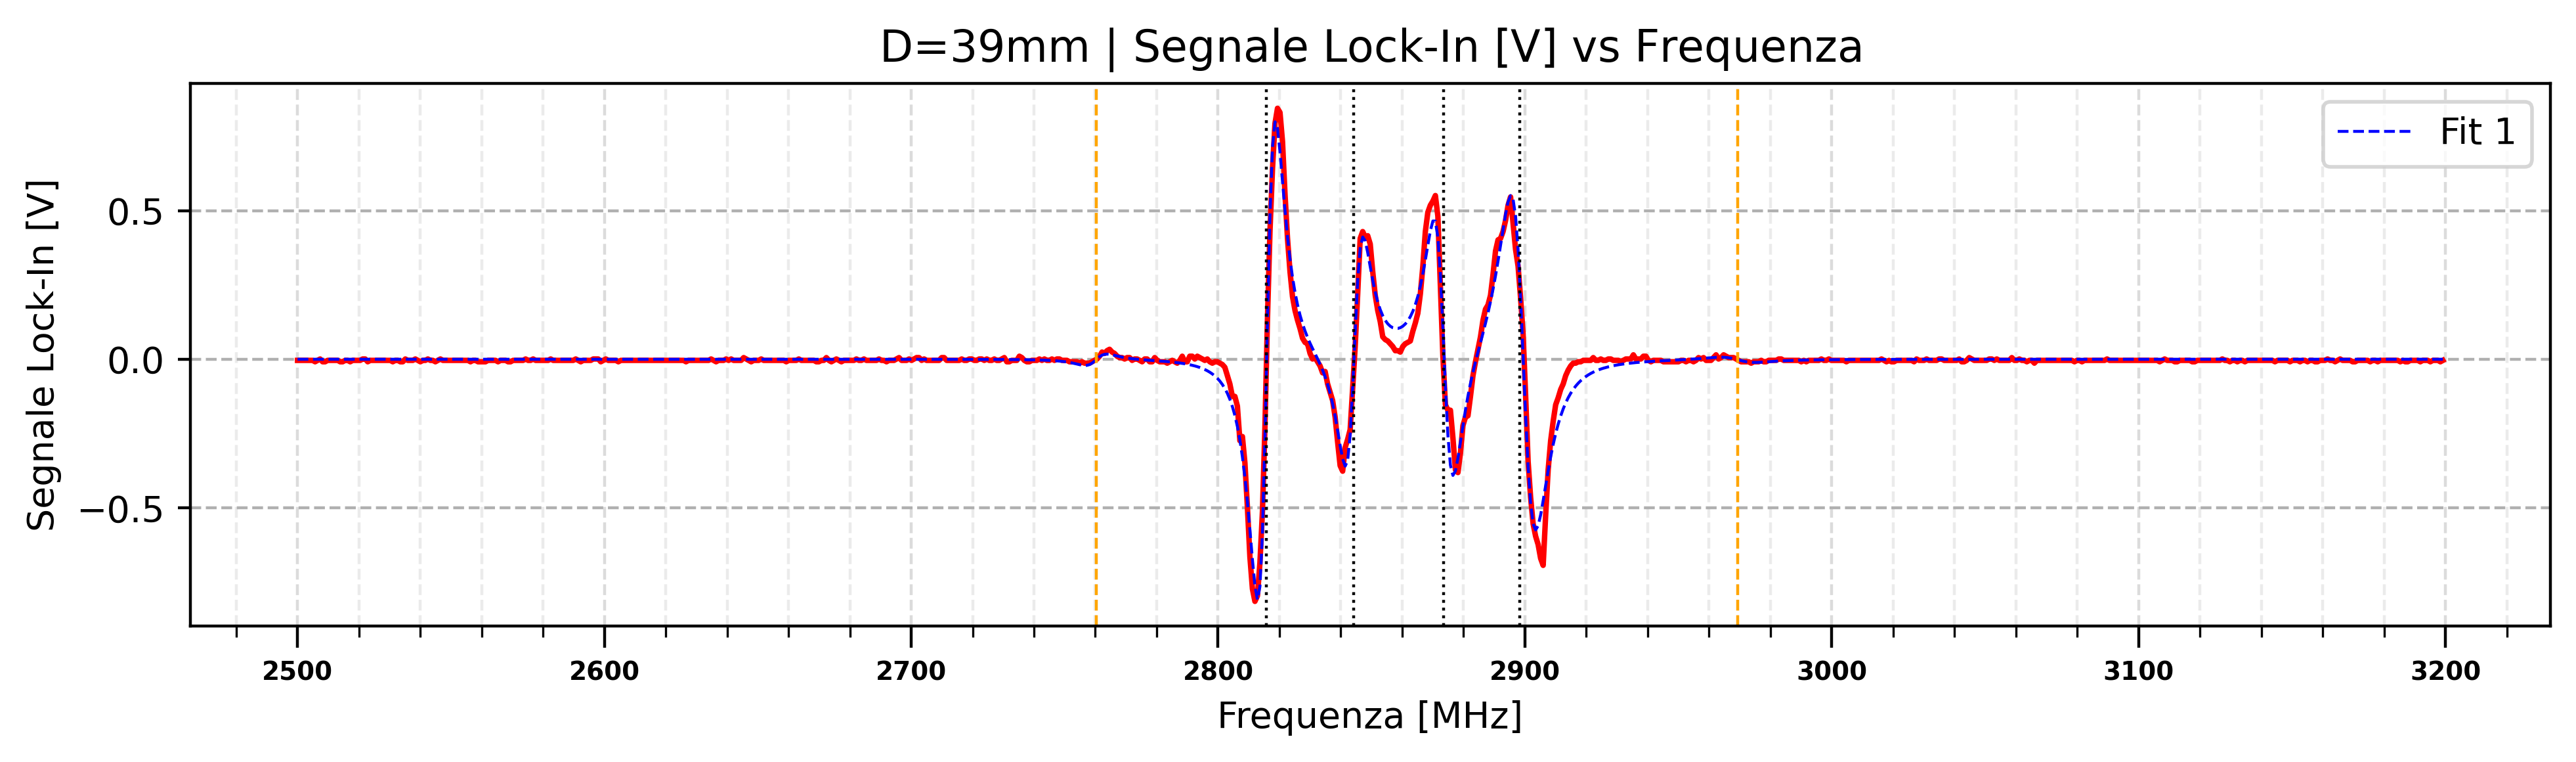

Centri:
  lockin    |    normal
2760.24678  |  ---
2815.82988  |  2815.64465
2844.39853  |  2844.11209
2873.56268  |  2873.50805
2899.49598  |  2898.40028
2969.42835  |  ---


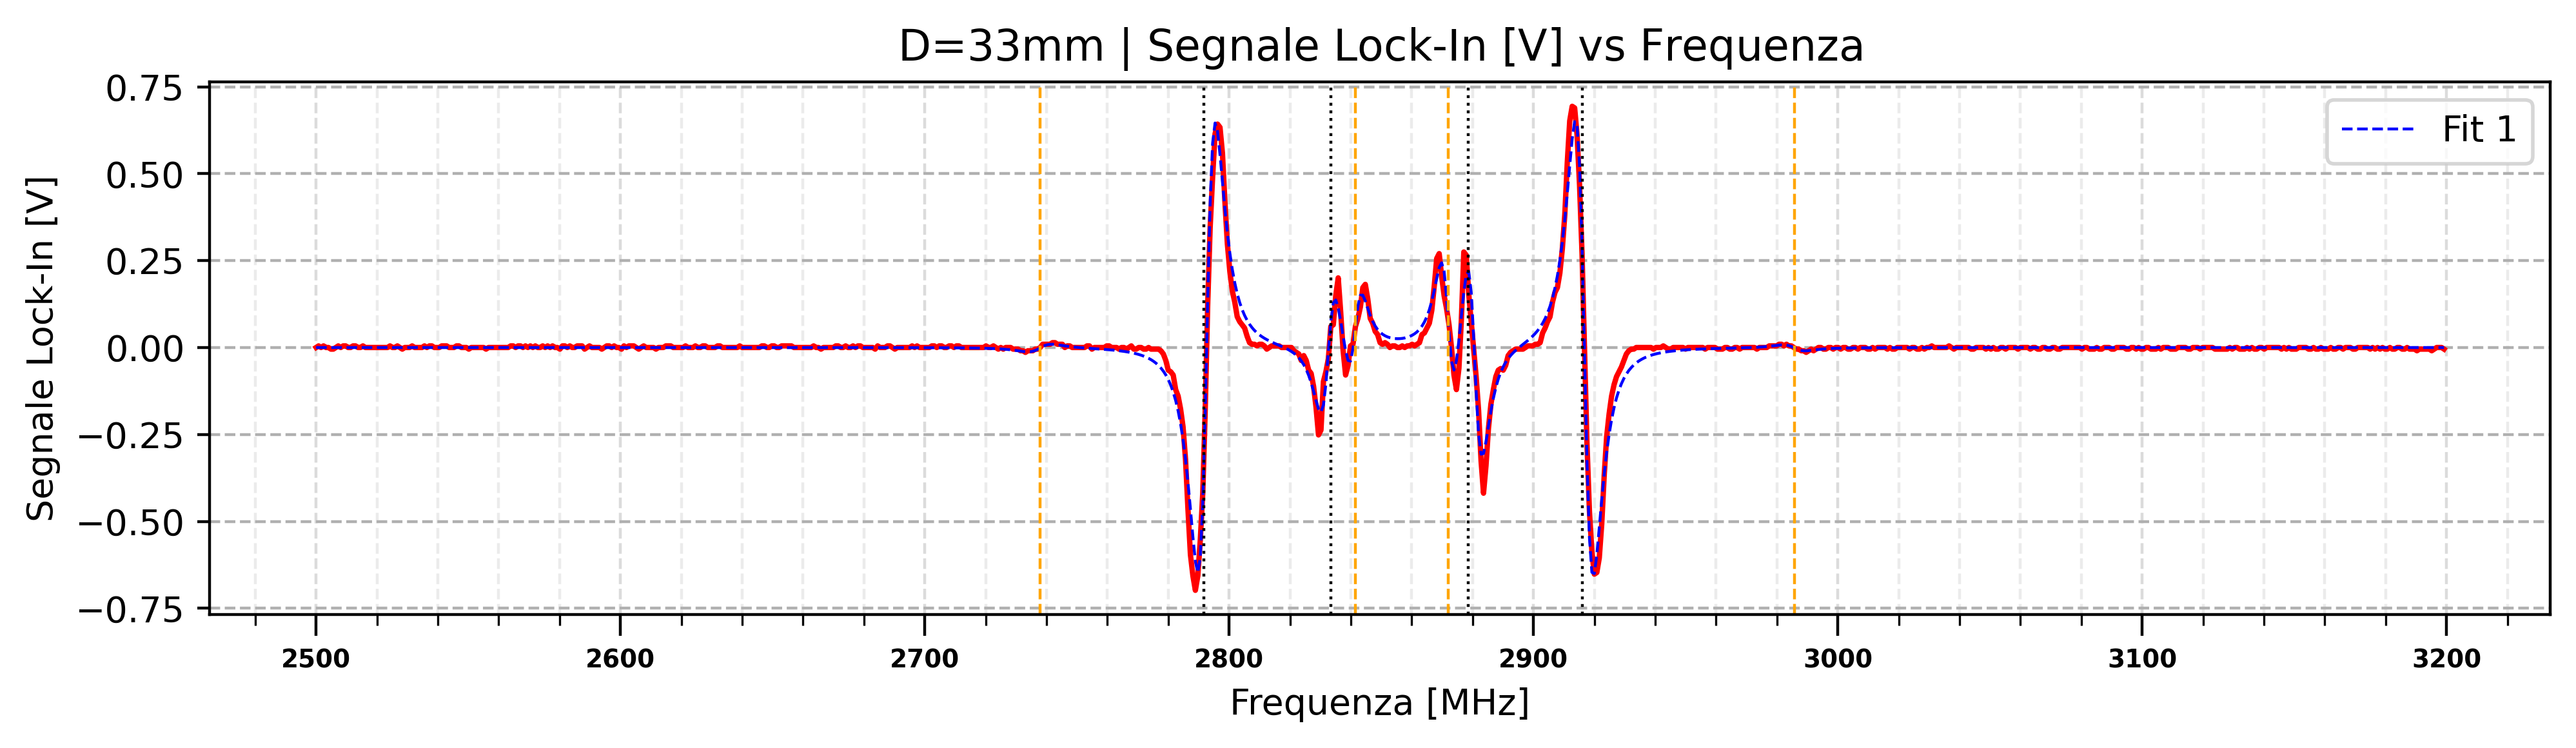

Centri:
  lockin    |    normal
2737.83333  |  ---
2792.60582  |  2791.63047
2841.37390  |  ---
2871.96714  |  ---
2832.55626  |  2833.46923
2880.68288  |  2878.51504
2916.71670  |  2916.03925
2985.65707  |  ---


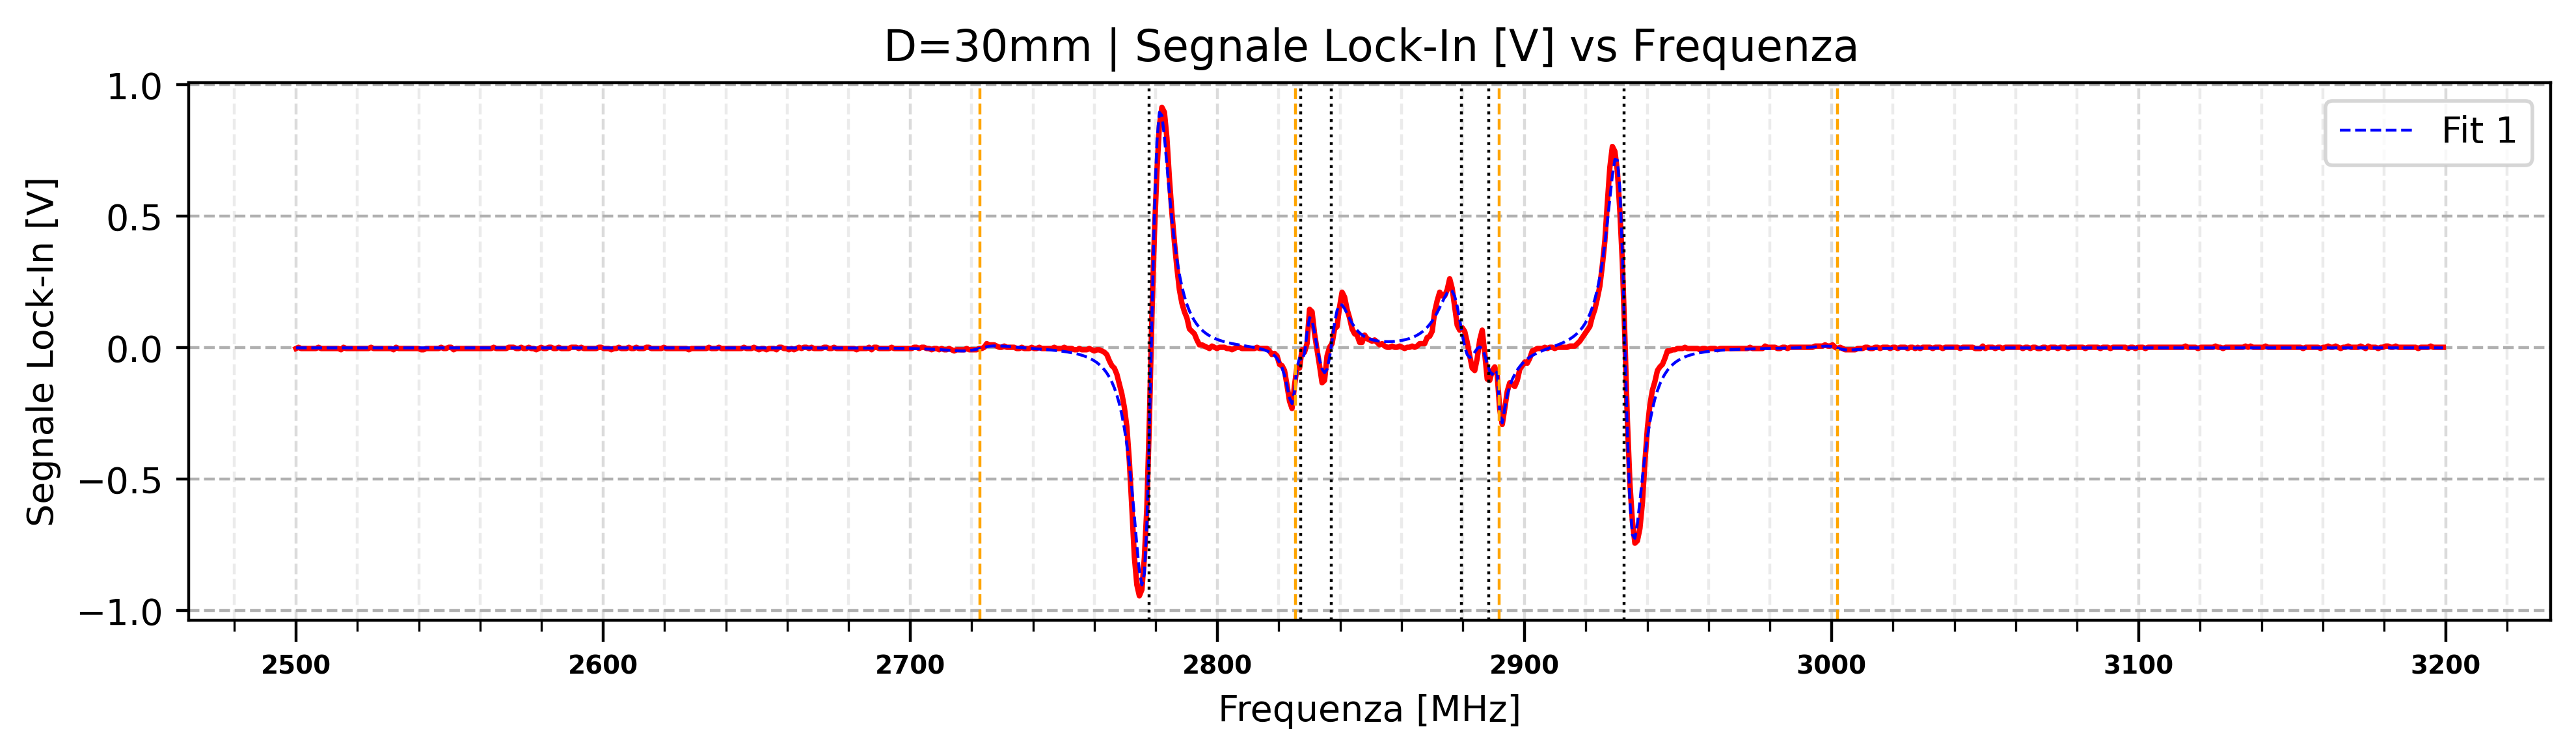

Centri:
  lockin    |    normal
2722.70864  |  ---
2778.49171  |  2777.69641
2825.50996  |  ---
2828.93165  |  2827.21598
2837.35104  |  2837.11169
2879.29025  |  2879.46904
2888.06150  |  2888.46762
2891.71257  |  ---
2932.76072  |  2932.49721
3002.01082  |  ---


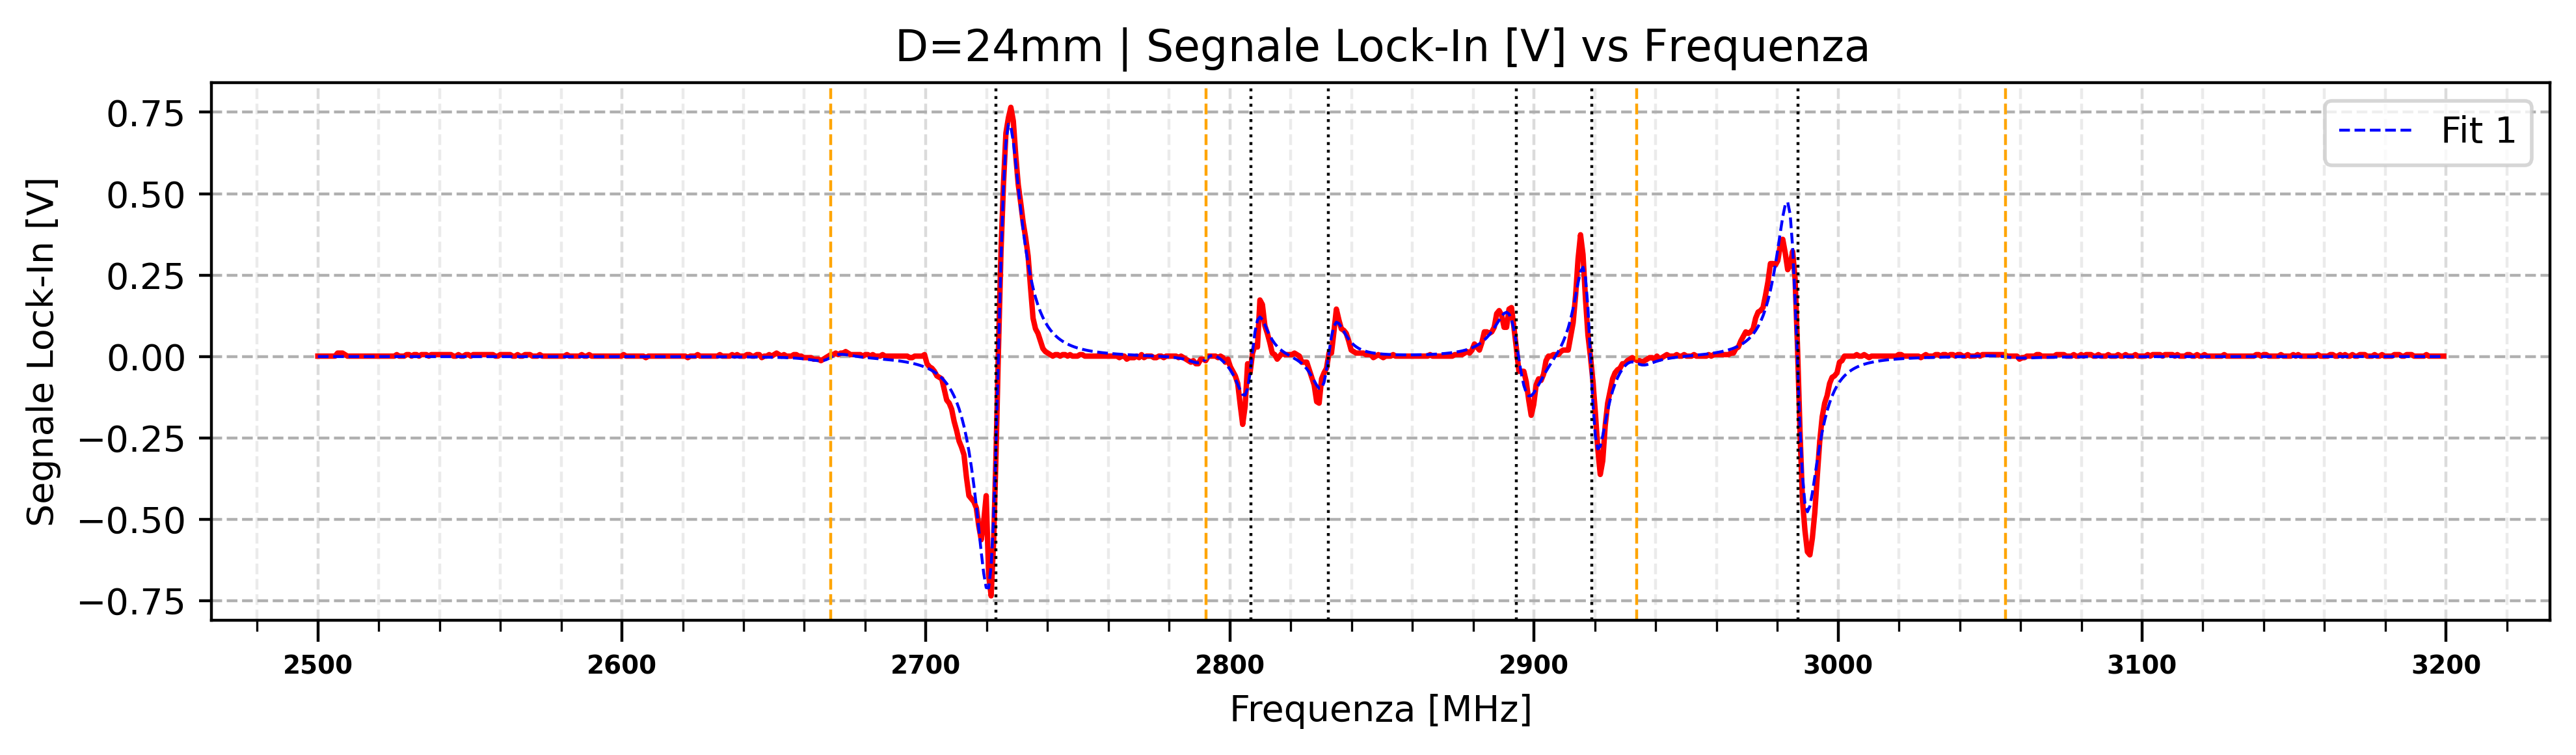

Centri:
  lockin    |    normal
2668.64042  |  ---
2723.82289  |  2723.03471
2792.14871  |  ---
2807.24141  |  2806.81932
2832.43154  |  2832.39144
2894.78852  |  2894.23455
2918.60041  |  2919.08097
2933.66890  |  ---
2986.57750  |  2986.74085
3055.00000  |  ---


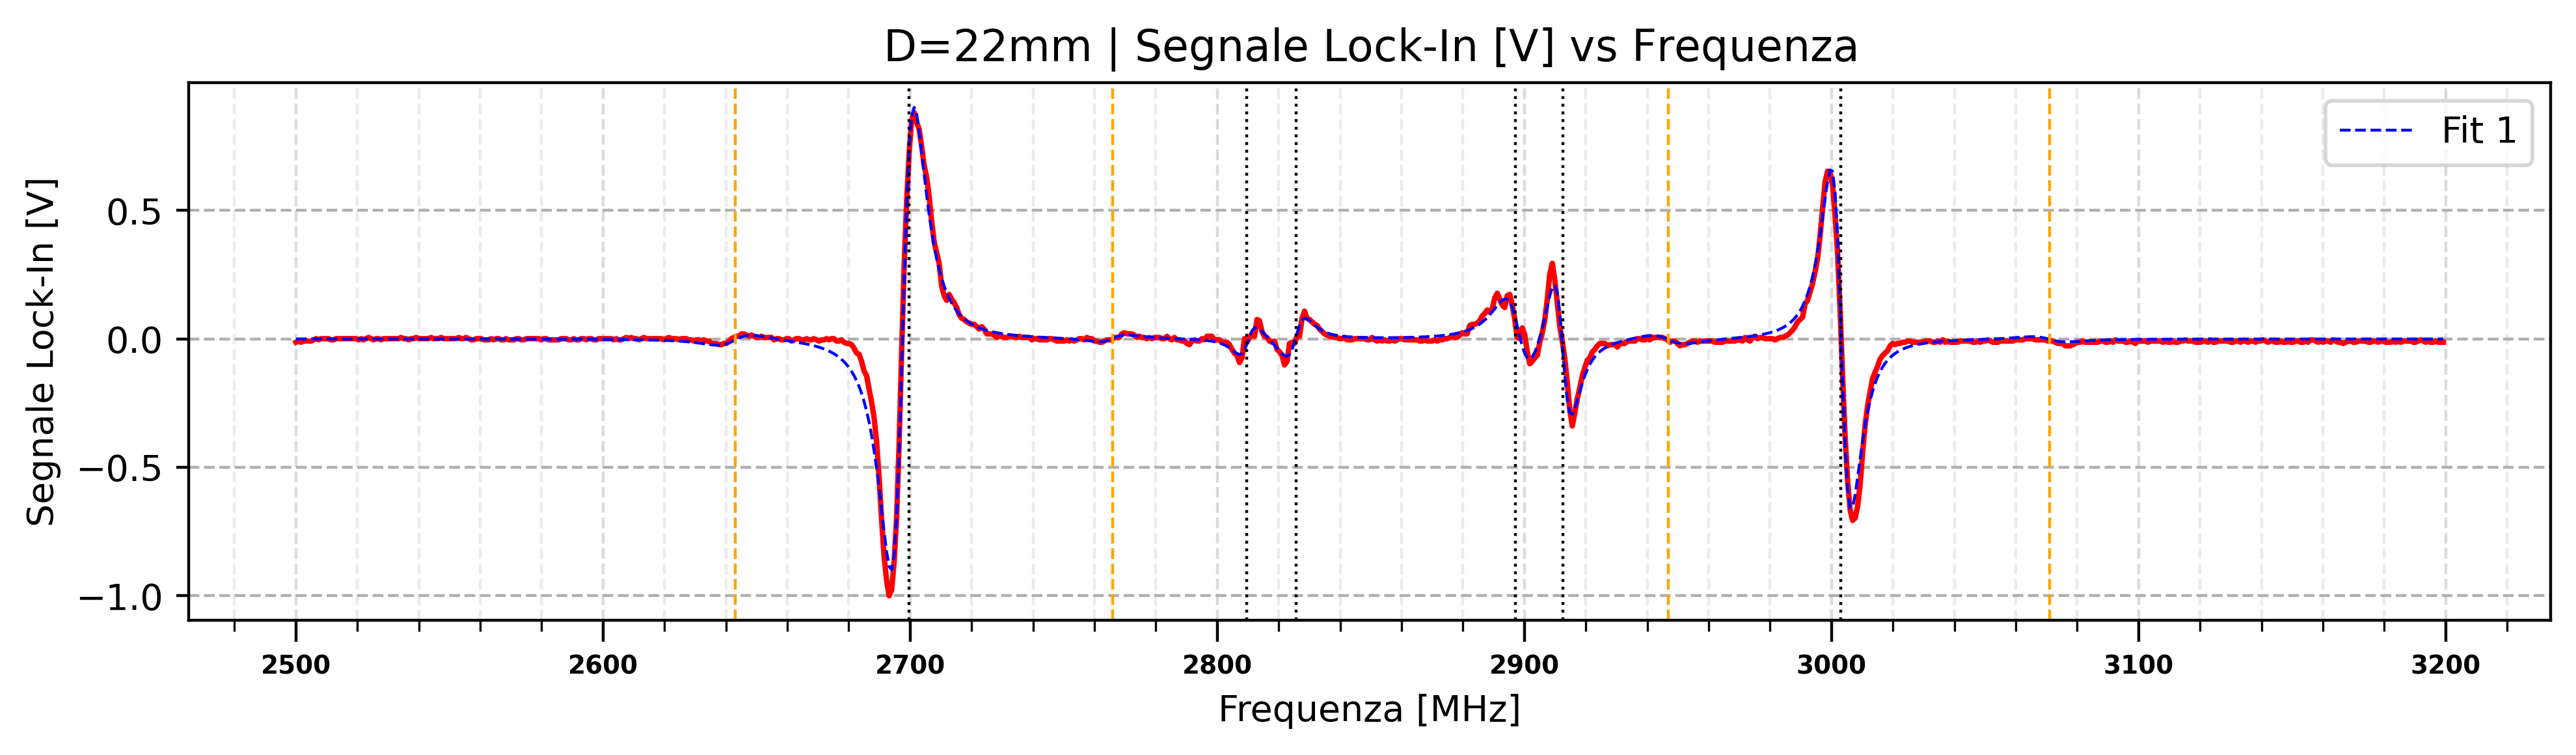

Centri:
  lockin    |    normal
2642.93278  |  ---
2697.50880  |  2699.54723
2765.98975  |  ---
2810.02485  |  2809.65453
2825.55073  |  2825.63927
2898.08380  |  2897.00257
2912.46084  |  2912.60723
2946.80776  |  ---
3003.15313  |  3003.09741
3070.98179  |  ---


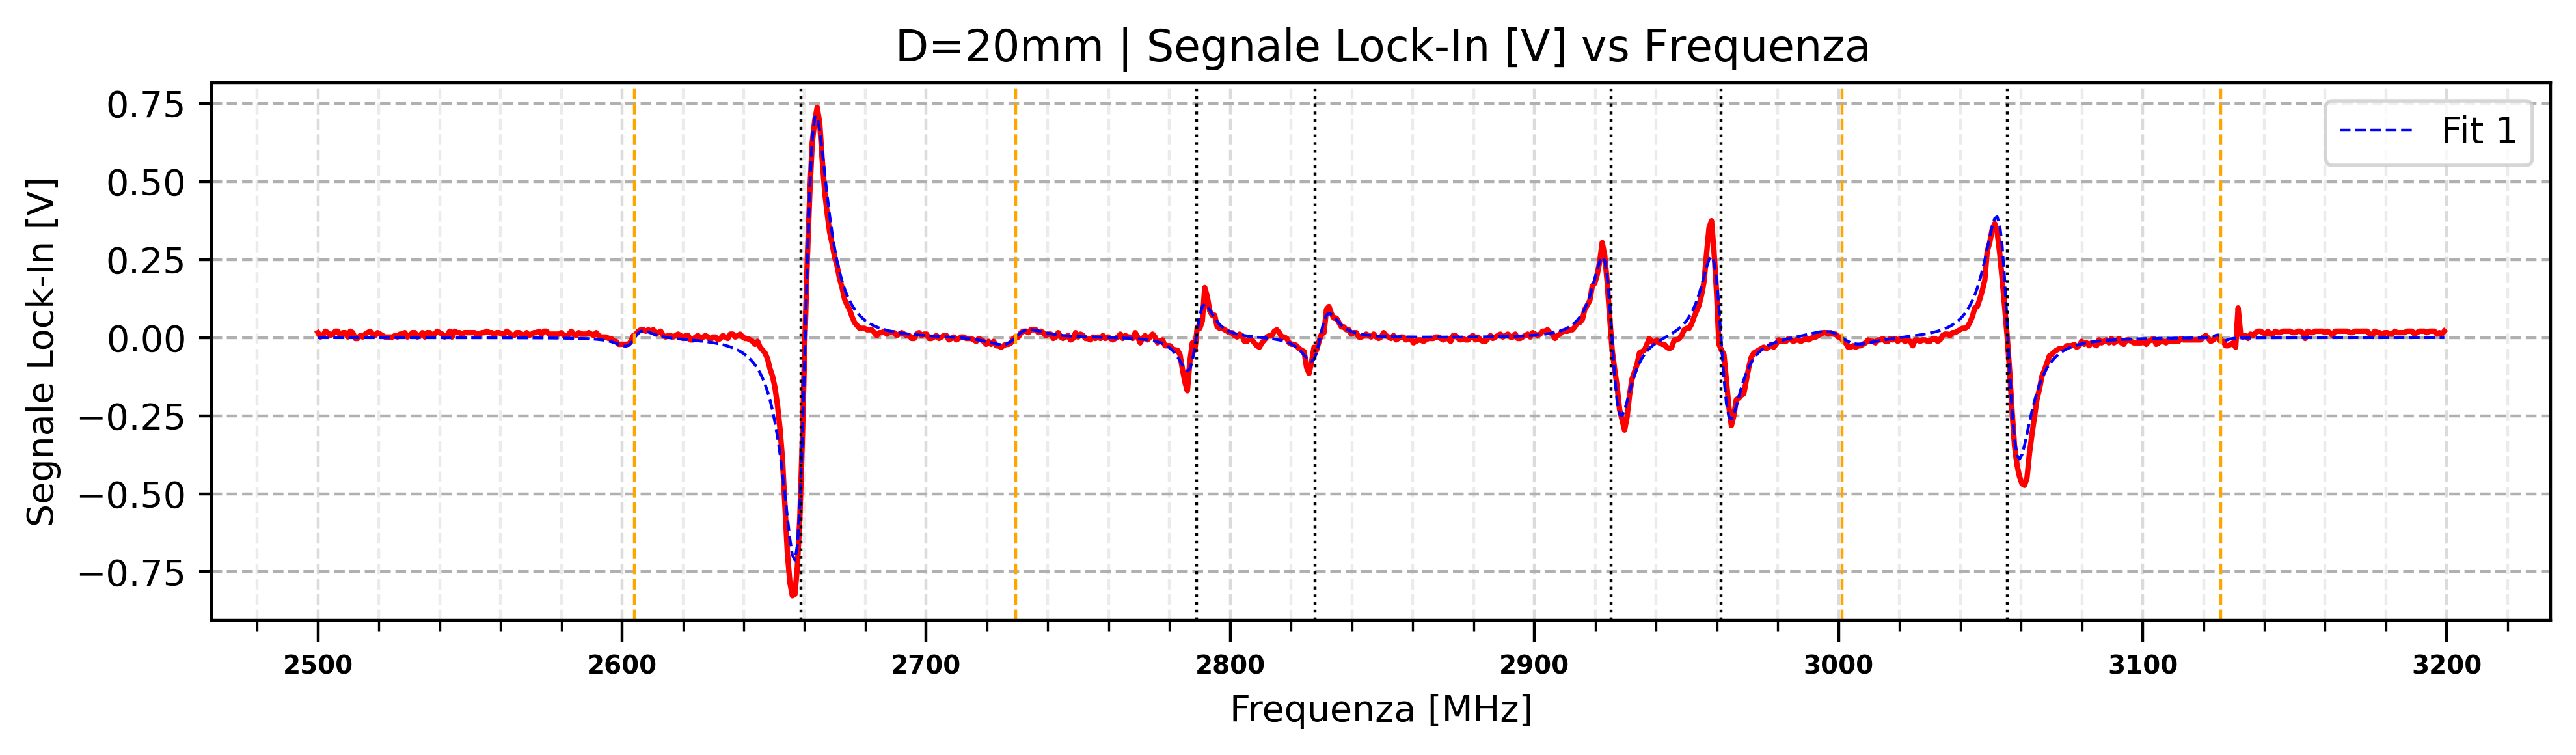

Centri:
  lockin    |    normal
2604.03957  |  ---
2660.22030  |  2658.89145
2729.45902  |  ---
2788.77629  |  2788.99757
2829.54571  |  2827.76605
2925.47332  |  2925.28289
2961.37560  |  2961.40860
3001.11786  |  ---
3055.67798  |  3055.39827
3125.74293  |  ---


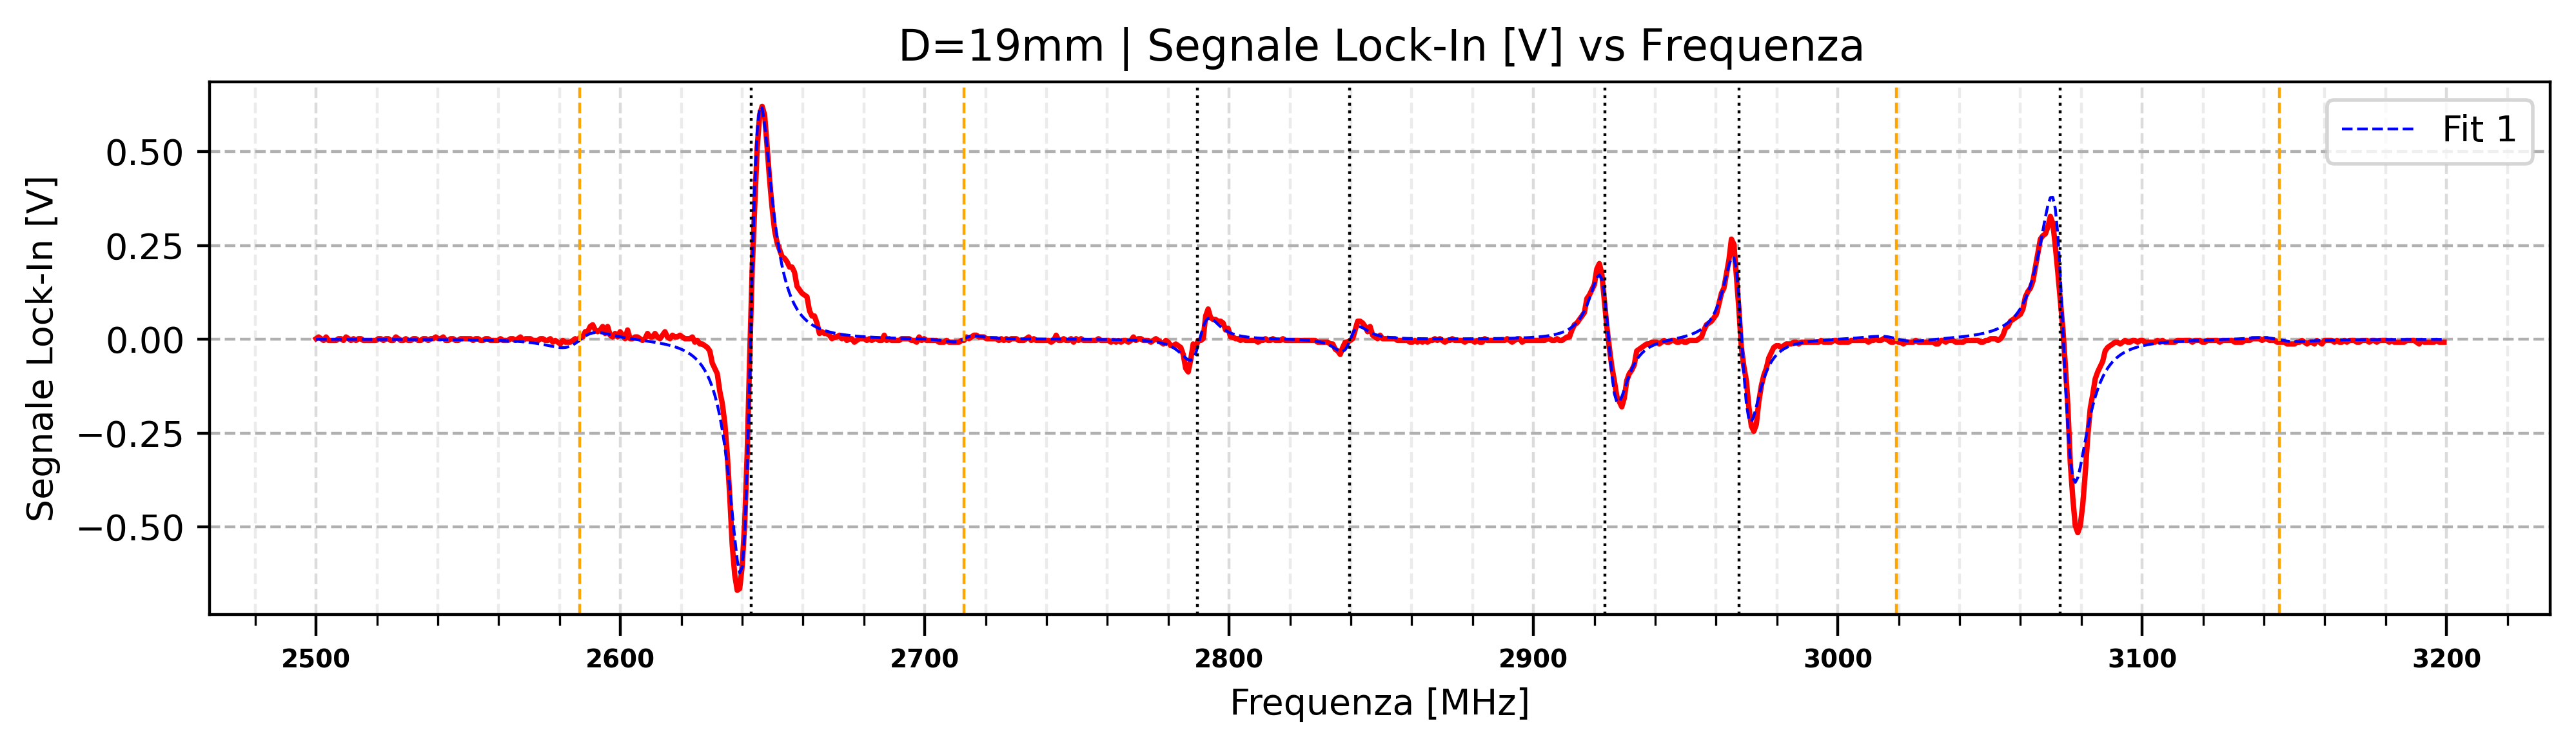

Centri:
  lockin    |    normal
2586.62998  |  ---
2642.74101  |  2642.95991
2712.87535  |  ---
2790.34323  |  2789.58385
2839.85725  |  2839.67311
2924.69173  |  2923.55197
2968.41501  |  2967.48125
3019.29597  |  ---
3074.11136  |  3073.10975
3145.00000  |  ---


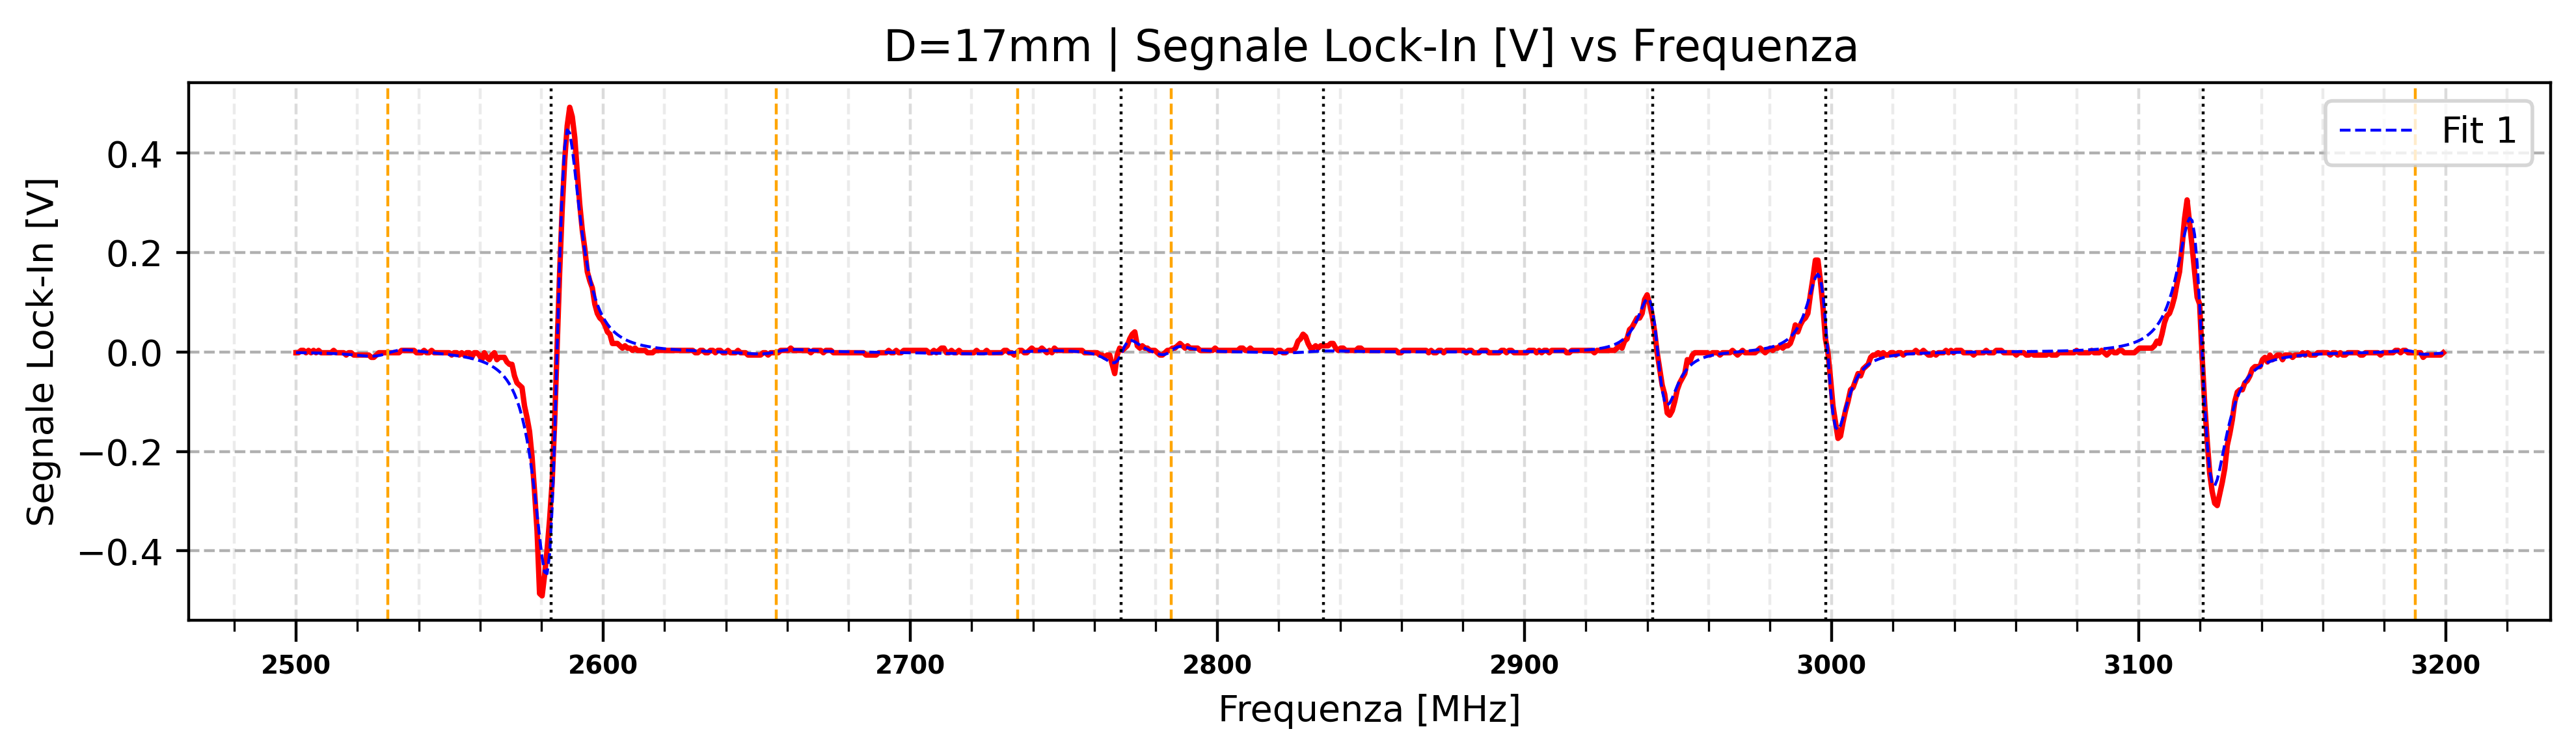

Centri:
  lockin    |    normal
2530.00000  |  ---
2585.00969  |  2583.03775
2656.40901  |  ---
2735.00000  |  ---
2769.03723  |  2768.75160
2785.00000  |  ---
2829.47545  |  2834.47545
2943.36666  |  2941.80317
2998.74525  |  2998.15610
3120.64607  |  3121.04184
3190.00000  |  ---


In [ ]:
def build_name (dist):
    return f"data/cristallo2_aligned_cleaned/odmr_dist_{dist}_cleaned.csv"

distanze = [17, 19, 20, 22, 24, 30, 33, 39, 40, 1000]
nu0s_lockin = {}
gammas_lockin = {}

originals_nu0s_dict = {}
initial_guesses_nu0s_dict = {}

# Primo loop inutile ma devo normalizzare gli spettri
massimo_assoluto = 0
for i, dist in enumerate(reversed(distanze)):
    # costruisco il nome del file
    nome = build_name(dist)
    # leggo il file e immagazzino le informazioni in un oggetto 'spettro' (dizionario)
    spettro = leggi_file_odmr(nome)
    # correggo lo spettro lock-in
    spettro = trasla_spettro_lock_in(spettro)
    # cerco il massimo assoluto
    if np.max(np.abs(spettro['lock'])) > massimo_assoluto:
        massimo_assoluto = np.max(np.abs(spettro['lock']))

# Nel loop:
for i, dist in enumerate(reversed(distanze)):
    nu0s_lockin[dist] = []
    gammas_lockin[dist] = []
    
    originals_nu0s = nu0s[dist].copy()
    originals_nu0s_dict[dist] = originals_nu0s.copy()
    
     # costruisco il nome del file
    nome = build_name(dist)
    # leggo il file e immagazzino le informazioni in un oggetto 'spettro' (dizionario)
    spettro = leggi_file_odmr(nome)
    # correggo lo spettro lock-in
    spettro = trasla_spettro_lock_in(spettro)
    # normalizzo lo spettro lock-in
    spettro['lock'] = spettro['lock'] / massimo_assoluto
    
    # Crea la funzione di fit specifica per questo numero di deep
    # HACK: a 33mm il lock-in vede una separazione in più! vanno aggiunti due deep
    if dist == 33:
        nu0s[dist] = nu0s[dist][:1] + [nu0s[dist][1] + 3, nu0s[dist][2] - 5] + nu0s[dist][1:]
        gammas[dist] = gammas[dist][:1] + [gammas[dist][1], gammas[dist][1]] + gammas[dist][1:]
        
        
    nu0s[dist], gammas[dist] = aggiungi_possibili_picchi_mancanti(nu0s[dist], gammas[dist], dist)
    initial_guesses_nu0s_dict[dist] = nu0s[dist].copy()
    
    # quanti deep mi aspetto?
    N_deeps = len(nu0s[dist]) 
    fit_func = make_N_derivate_lorentziane(N_deeps)
    
    # Parametri iniziali (SENZA N_deeps all'inizio)
    p0 = []
    low = []
    upp = []
    for j in range(N_deeps):
        p0 += [5, gammas[dist][j], nu0s[dist][j]]
        low += [0, gammas[dist][j]/1.5, nu0s[dist][j] - 5]
        upp += [np.inf, gammas[dist][j]*5, nu0s[dist][j] + 5] # prima: [np.inf, gammas[dist][j]*1.5, nu0s[dist][j] + 5]

    # fitto lo spettro lock-in
    popt, pcov = curve_fit(fit_func, spettro['freq'], spettro['lock'], p0=p0, bounds=(low, upp), maxfev=10000)
    # lista dei picchi nuovi 'mancanti' trovati
    new_piks = [popt[3*j + 2] for j in range(N_deeps) if nu0s[dist][j] not in originals_nu0s]
    # plotto lo spettro
    # plot_odmr(spettro, key='lock', dist=dist, fit_curves=[(spettro['freq'], fit_func(spettro['freq'], *popt))])
    plot_odmr(spettro, key='lock', dist=dist, fit_curves=[(spettro['freq'], fit_func(spettro['freq'], *popt))], option=True, originals_nu0s=originals_nu0s, new_piks=new_piks)
    
    # printo i centri trovati
    print("Centri:")
    print("  lockin    |     odmr")  
    for j in range(N_deeps):
        nu0s_lockin[dist].append(popt[3*j + 2])
        gammas_lockin[dist].append(popt[3*j + 1])
        if popt[3*j] > max_a:
            max_a = popt[3*j]
        if dist == 33 and j in [2,3]:
            pik = popt[3*j + 2]
            print(f"{pik:.5f}  |  ---")
        else:
            pik = popt[3*j + 2]
            original = nu0s[dist][j]
            if original in originals_nu0s:
                print(f"{pik:.5f}  |  {original:.5f}")
            else:
                print(f"{pik:.5f}  |  ---")

    # SALVATAGGIO DELLA MULTI-LORENTZIANA
    nome_fit = f"data/cristallo2_n_lorentzians/odmr_dist_{dist}_lorentz.csv"
    freq_data = spettro['freq']
    graph_function = make_N_lorentziane(N_deeps)
    fit_data = graph_function(spettro['freq'], *popt) / 9.07159411734923 # normalizza

    # Salva i dati in formato CSV
    with open(nome_fit, 'w') as f:
        f.write("  freq    |   fit    \n")
        f.write("----------+----------\n")
        for freq, fit_val in zip(freq_data, fit_data):
            f.write(f"{freq:9.3f} | {fit_val:8.5f}\n")
            

---

# Frequenza v B

I valori di B sono presi dal fit del magnete piccolo, vedi 4-fit_magneti.ipynb

La funzione con cui interpolare è: 
$$
\nu_\pm = D \pm \sqrt{E^2+(\gamma_{fit}\cdot B_{0})^{2}}
$$
con $D=2.87\ \text{GHz}$ e $E=10\ \text{MHz}$. Poi si ricava l'angolo con:
$$
\cos{\alpha} = \frac{\gamma_{fit}}{\gamma} \implies 
\alpha = \arccos{\frac{\gamma_{fit}}{\gamma}}
$$
in cui $\gamma=\pm28\ \text{GHzT}^{-1}$

Occorre anche propagare l'errore da $\gamma_{fit}$ ad $\alpha$, usando la derivata dell'arcocoseno:
$$
\frac{d}{dx} \arccos{x} = \frac{1}{\sqrt{1-x^2}}
$$
pertanto:
$$
\sigma_\alpha = \frac{\sigma_{\gamma_{fit}}}{\gamma\sqrt{1-\left(\frac{\gamma_{fit}}{\gamma}\right)^2}}
$$

In [7]:
previsioni_B = np.array([0.01685433, 0.01270503, 0.01110222, 0.00857636, 0.00671791,
       0.00345788, 0.00255966, 0.00147035, 0.00134735, 0])
err_B = [0.02128, 0.01618, 0.01420, 0.01106, 0.00874, 0.00463, 0.00348] #... non hanno senso questi errori!

### Fit Frequenza v B

Per fare il fit non posso usare le curve organizzate in questo modo. Mi serve un'array per ogni possibile curva 'che si allarga'. Il primo punto azzurro ha due curve con i due verdi dopo, che a loro volta vanno nei due rosa. Poi solo uno dei due rosa si separa e va in entrambi i marroni, mentre il rosa superiore finisce marrone solitario più in alto.

In [8]:
r_distanze = list(reversed(distanze))
r_B = list(reversed(previsioni_B))

In [9]:
# Sicuramente due vettori sono elementari: uno ha prende il primo elemento di ciascun array, l'altro l'ultimo.
primi, ultimi = [], []
err_primi, err_ultimi = [], []

primissimi, ultimissimi = [], []
err_primissimi, err_ultimissimi = [], []

dopo_i_primi, prima_degli_ultimi = [], [] # dopo i primi, non dopo i primissimi!
err_dopo_i_primi, err_prima_degli_ultimi = [], []

nu0s_123_lockin = {}
gammas_123_lockin = {}

for dist in r_distanze:
    nu0s_123_lockin[dist] = [nu0s_lockin[dist][i] for i in range(len(nu0s_lockin[dist])) if initial_guesses_nu0s_dict[dist][i] in originals_nu0s_dict[dist]]
    gammas_123_lockin[dist] = [gammas_lockin[dist][i] for i in range(len(gammas_lockin[dist])) if initial_guesses_nu0s_dict[dist][i] in originals_nu0s_dict[dist]]
    
for dist in r_distanze:
    primi.append(nu0s_123_lockin[dist][0])
    err_primi.append(gammas_123_lockin[dist][0])
    ultimi.append(nu0s_123_lockin[dist][-1])
    err_ultimi.append(gammas_123_lockin[dist][-1])
# Poi ci sono i due intermedi, che prendono il secondo e il penultimo di tutti gli array, dopo il primo ovviamente.
intermedi1, intermedi2 = [], []
err_intermedi1, err_intermedi2 = [], []
intermedi1.append(nu0s_123_lockin[1000][0]) 
intermedi2.append(nu0s_123_lockin[1000][1])
err_intermedi1.append(gammas_123_lockin[1000][0])
err_intermedi2.append(gammas_123_lockin[1000][1])
for dist in r_distanze[1:]:
    intermedi1.append(nu0s_123_lockin[dist][1])
    intermedi2.append(nu0s_123_lockin[dist][-2])
    err_intermedi1.append(gammas_123_lockin[dist][1])
    err_intermedi2.append(gammas_123_lockin[dist][-2])
# Infine i due centrali. Dovrò prendere il terzo e il terzultimo elemento, 
# ma solo in quelli che hanno almeno 6 punti. Cioè il quarto indice dell'array distanze.
centrali1, centrali2 = [], []
err_centrali1, err_centrali2 = [], []
centrali1.append(nu0s_123_lockin[1000][0]) # per la prima distanza ci sono solo due punti
centrali2.append(nu0s_123_lockin[1000][1])
err_centrali1.append(gammas_123_lockin[1000][0])
err_centrali2.append(gammas_123_lockin[1000][1])
for dist in r_distanze[1:4]:
    centrali1.append(nu0s_123_lockin[dist][1])
    centrali2.append(nu0s_123_lockin[dist][-2])
    err_centrali1.append(gammas_123_lockin[dist][1])
    err_centrali2.append(gammas_123_lockin[dist][-2])
for dist in r_distanze[4:]:
    centrali1.append(nu0s_123_lockin[dist][2])
    centrali2.append(nu0s_123_lockin[dist][-3])
    err_centrali1.append(gammas_123_lockin[dist][2])
    err_centrali2.append(gammas_123_lockin[dist][-3])
    
for dist in r_distanze[2:]:
    primissimi.append(nu0s_lockin[dist][0])
    ultimissimi.append(nu0s_lockin[dist][-1])
    err_primissimi.append(gammas_lockin[dist][0])
    err_ultimissimi.append(gammas_lockin[dist][-1])
    
for dist in r_distanze[4:-1]:
    dopo_i_primi.append(nu0s_lockin[dist][2])
    prima_degli_ultimi.append(nu0s_lockin[dist][-3])
    err_dopo_i_primi.append(gammas_lockin[dist][2])
    err_prima_degli_ultimi.append(gammas_lockin[dist][-3])
    

In [10]:
gammas_lockin

{1000: [np.float64(9.999999999999998),
  np.float64(12.425498817443618),
  np.float64(9.995995081657561),
  np.float64(9.078545901771243),
  np.float64(9.999999999853038)],
 40: [np.float64(9.999999999999998),
  np.float64(5.309732492842241),
  np.float64(4.875456573595489),
  np.float64(5.572910208104874),
  np.float64(9.300185907281566),
  np.float64(9.999999999999998),
  np.float64(9.999999999999998)],
 39: [np.float64(6.212683530178763),
  np.float64(5.046835596197697),
  np.float64(4.970223569759446),
  np.float64(5.450309956630333),
  np.float64(7.001392546482918),
  np.float64(9.99999999994633)],
 33: [np.float64(6.9209154125968775),
  np.float64(4.982062954242652),
  np.float64(3.9663105931963343),
  np.float64(4.074650412862138),
  np.float64(4.390618116211912),
  np.float64(4.364160728453608),
  np.float64(5.017019684887669),
  np.float64(6.190926715693845)],
 30: [np.float64(9.999999999999998),
  np.float64(5.100871517220172),
  np.float64(2.6640005145643495),
  np.float64(3

### Plot e Fit

In [11]:
list_gamma_fit = []
list_err_gamma_fit = []
popt_array = []

In [ ]:
def funzione_fit_plus(B, gamma_fit, D):
    # D e E sarebbero fissi, ma gli lasciamo un minimo di libertà
    E_quadro = 100
    return D + np.sqrt(E_quadro + (gamma_fit*B)**2)
def funzione_fit_minus(B, gamma_fit, D):
    # Per le curve che scendono
    E_quadro = 100
    return D - np.sqrt(E_quadro + (gamma_fit*B)**2)

# le curve che salgono hanno il più, quelle che scendono il meno (plus=False)
def fit_plot(B, freq, err_f, gamma_fit_0, D_0, label, color, plus=True, print_fit=True, plot_fit=True):
    B = np.asarray(B)
    freq = np.asarray(freq)
    err_f = np.asarray(err_f)

    p0 = [gamma_fit_0, D_0] # gamma in GHz/T, D in MHz, E in MHz (ma plotto in MHz)
    upp = [gamma_fit_0*2, D_0+10] if plus else [gamma_fit_0*2, D_0]
    low = [gamma_fit_0/2, D_0-10] 

    popt, pcov = curve_fit(funzione_fit_plus if plus else funzione_fit_minus, B, freq, p0=p0, bounds=(low, upp), maxfev=1000000, sigma=err_f)
    perr = np.sqrt(np.diag(pcov))
    
    popt_array.append(popt)
    
    # Calcolo chi quadro ridotto
    if plus:
        fit_vals = funzione_fit_plus(B, *popt)
    else:
        fit_vals = funzione_fit_minus(B, *popt)
    residui = freq - fit_vals
    chi2 = np.sum((residui / err_f)**2)
    dof = len(B) - len(popt)
    chi2_red = chi2 / dof if dof > 0 else float('nan')

    plt.errorbar(B, freq, color=color, fmt='o', yerr=err_f, markersize=1, capsize=3)

    if plot_fit:
        B_fit = np.linspace(0, 0.018, 100)
        freq_fit = funzione_fit_plus(B_fit, *popt) if plus else funzione_fit_minus(B_fit, *popt)
        plt.plot(B_fit, freq_fit, label=label, color=color, linestyle='--', linewidth=0.8)
    
    if print_fit:
        print(f"{label}: gamma_fit={popt[0]:.3f} | D={popt[1]:.3f} | chi2_red={chi2_red:.2f}")
    
    if plot_fit:
        list_gamma_fit.append(popt[0])
        list_err_gamma_fit.append(perr[0])  # AGGIUNTO: salva l'errore su gamma_fit
    
    return popt, perr, chi2_red

-NV3: gamma_fit=15749.040 | D=2840.000 | chi2_red=1.51
-!!: gamma_fit=12258.510 | D=2869.990 | chi2_red=0.50
-NV2: gamma_fit=5940.651 | D=2860.000 | chi2_red=3.27
-NV1: gamma_fit=2479.975 | D=2860.000 | chi2_red=4.33
NV1: gamma_fit=4000.000 | D=2865.000 | chi2_red=1.99
NV2: gamma_fit=8456.851 | D=2857.014 | chi2_red=2.33
!!: gamma_fit=10313.278 | D=2860.000 | chi2_red=8.78
NV3: gamma_fit=16302.807 | D=2865.000 | chi2_red=3.03


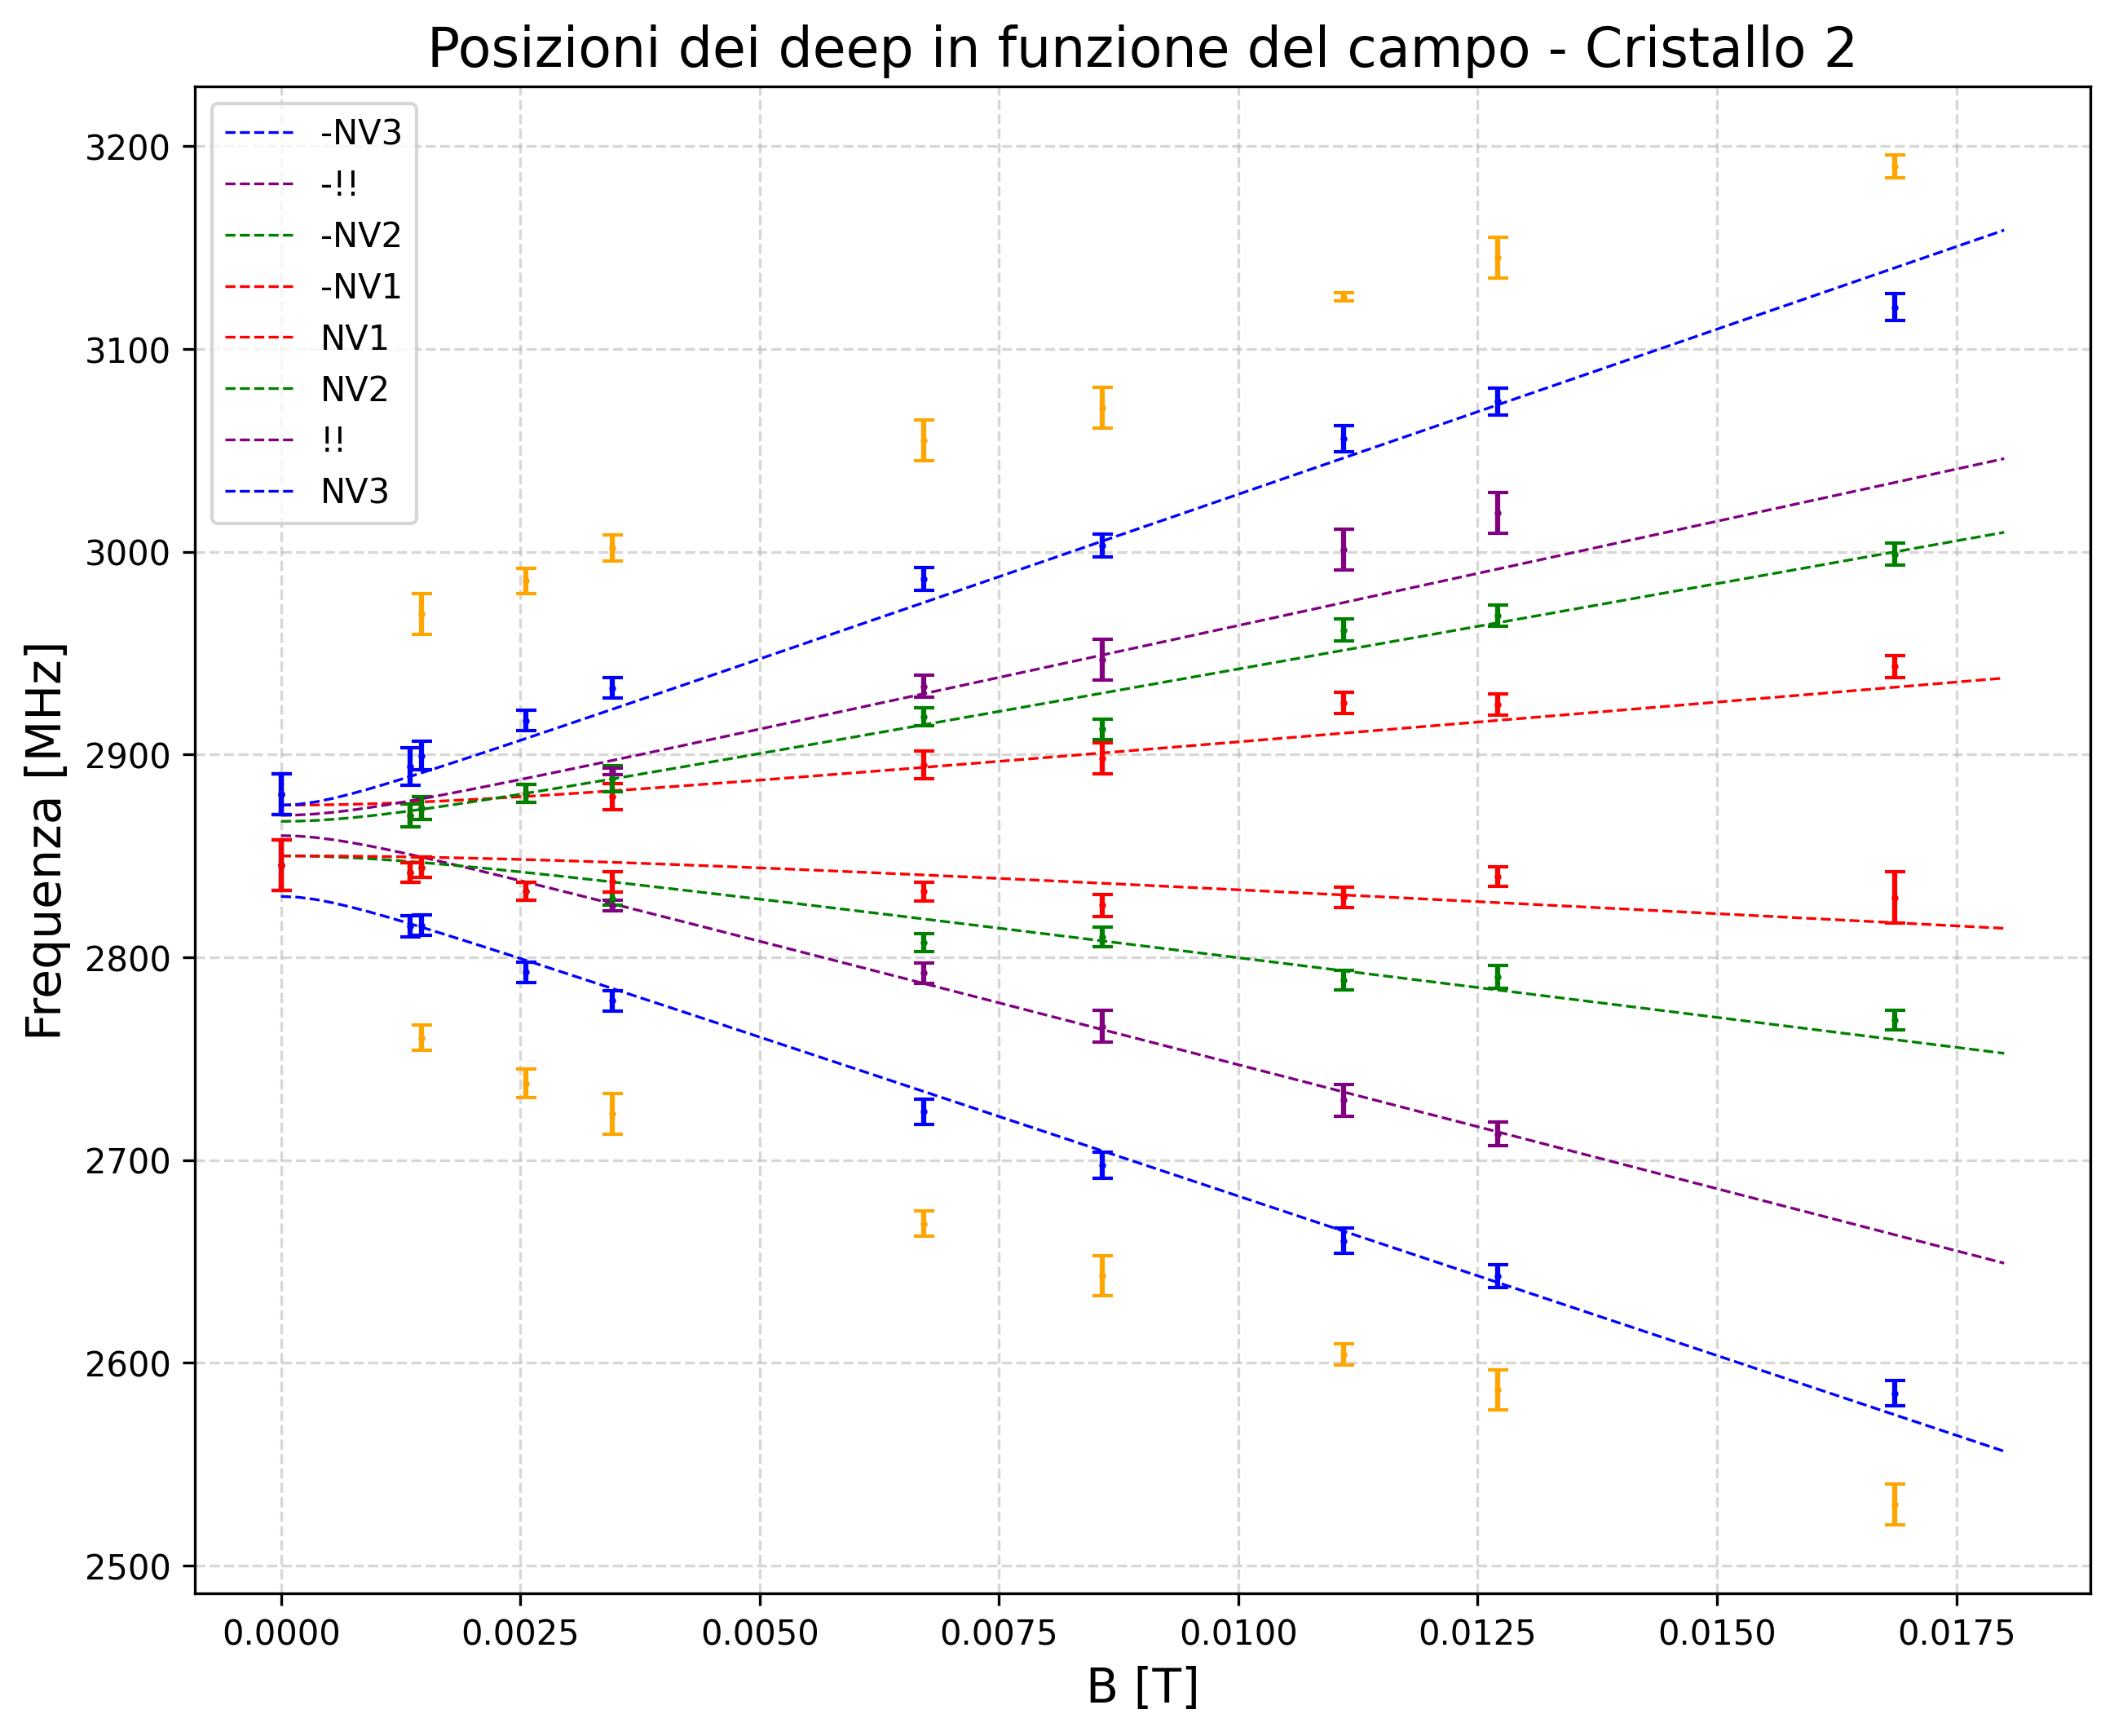

In [13]:
plt.figure(figsize=(10,8), dpi=300)
plt.title(f'Posizioni dei deep in funzione del campo - Cristallo 2', fontsize=16)
plt.xlabel('B [T]', fontsize=14)
plt.ylabel('Frequenza [MHz]', fontsize=14)

# ??
fit_plot(r_B[2:], primissimi, err_primissimi, 16000, 2870,'-?', 'orange', plus=False, print_fit=False, plot_fit=False) # ??


fit_plot(r_B, primi, err_primi, 16000, 2850,'-NV3', 'blue', plus=False) # CORRETTO


fit_plot(r_B[4:-1], dopo_i_primi, err_dopo_i_primi, 7000, 2870,'-!!', 'purple', plus=False) # !!


fit_plot(r_B, intermedi1, err_intermedi1, 6500, 2870, '-NV2', 'green', plus=False) # CORRETTO
fit_plot(r_B, centrali1, err_centrali1, 4000, 2870, '-NV1', 'red', plus=False) # CORRETTO
fit_plot(r_B, centrali2, err_centrali2, 2000, 2855, 'NV1', 'red') # CORRETTO
fit_plot(r_B, intermedi2, err_intermedi2, 6500, 2855, 'NV2', 'green') # CORRETTO


fit_plot(r_B[4:-1], prima_degli_ultimi, err_prima_degli_ultimi, 7000, 2870,'!!', 'purple') # !!


fit_plot(r_B, ultimi, err_ultimi, 16000, 2855, 'NV3', 'blue') # CORRETTO

# ??
fit_plot(r_B[2:], ultimissimi, err_ultimissimi, 16000, 2855,'?', 'orange', print_fit=False, plot_fit=False) # ??

plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [ ]:
for i, (gamma_f, err_gamma_f) in enumerate(zip(list_gamma_fit, list_err_gamma_fit)):
    cos_alpha = gamma_f / 28000 # gamma = 28 GHz
    alpha = np.arccos(cos_alpha)/np.pi*180
    sigma_alpha = ( 1/(28000* np.sqrt(1 - (gamma_f/28000)**2) )) * err_gamma_f
    print(f"{alpha:.2f} ± {sigma_alpha:.2f}" if i<4 else f"{-alpha:.2f} ± {sigma_alpha:.2f}")

55.77 ± 0.02
64.04 ± 0.02
77.75 ± 0.02
84.92 ± 0.03
81.79 ± 0.02
-72.42 ± 0.02
-68.39 ± 0.08
-54.39 ± 0.03


---

## Grafico con spettro odmr e lockin

qui mettiamo un bel grafico composto da due plot quello sopra odmr e quello sotto lockin 

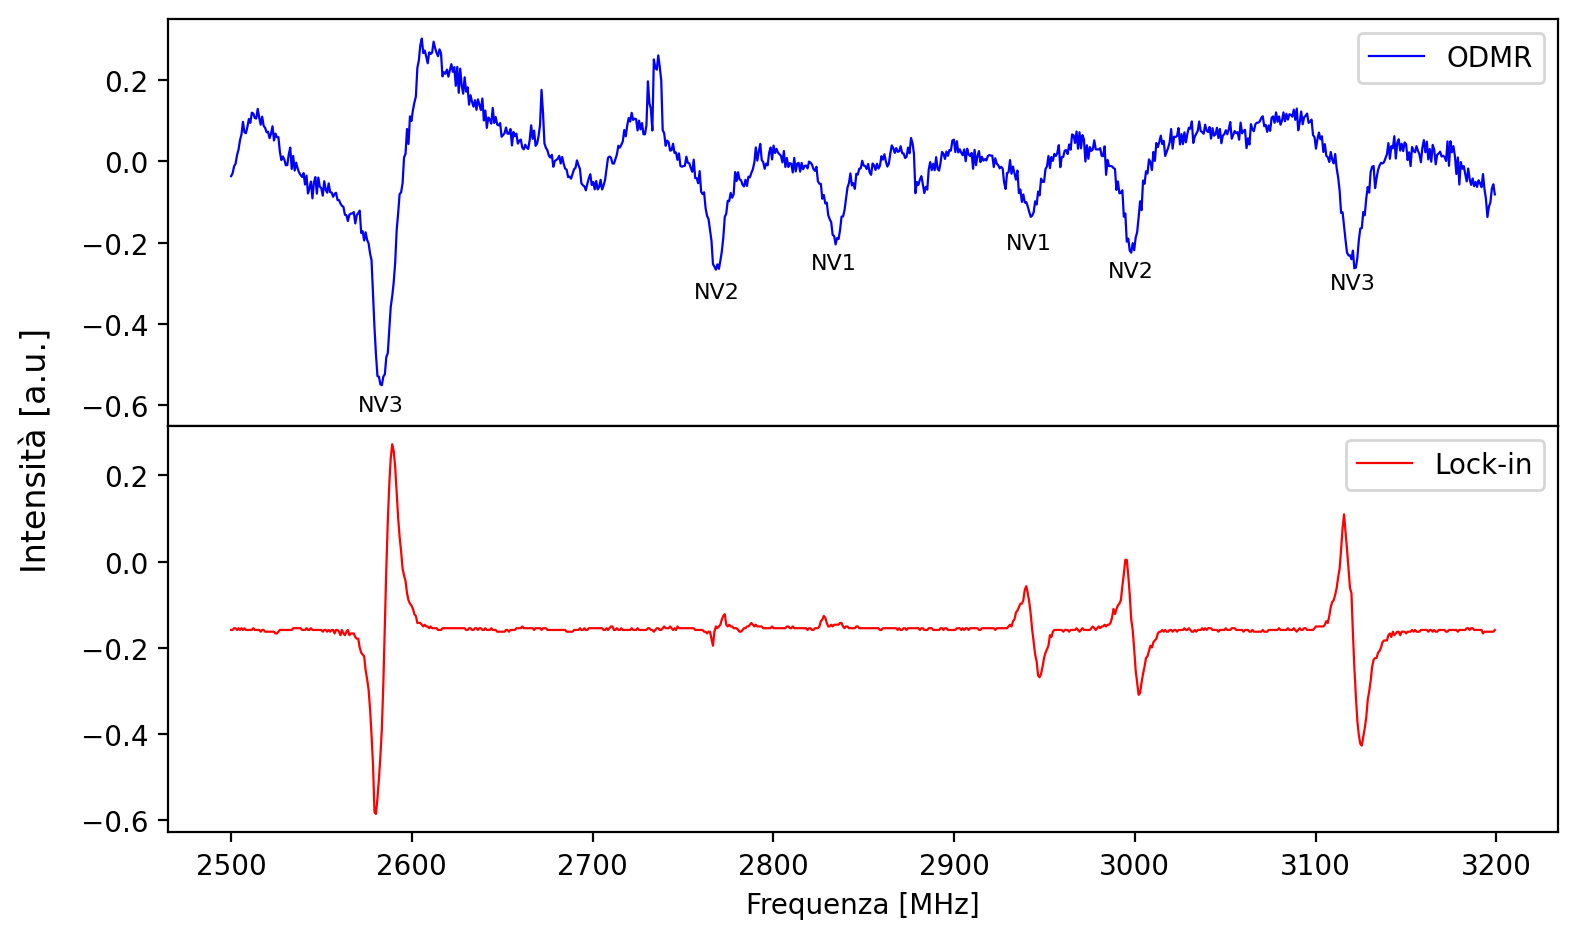

In [15]:
data = np.loadtxt("data/cristallo2_aligned_cleaned/odmr_dist_17_cleaned.csv", delimiter='|', skiprows=2)
x_od = data[:, 0]
y_od = data[:, 2]
y_lock = data[:, 3]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True, gridspec_kw={'hspace': 0.0}, dpi=200)
fig.supylabel('Intensità [a.u.]')

# ODMR (sopra)
ax1.plot(x_od, y_od, 'b-', label='ODMR', linewidth=0.8)
# ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.65, 0.35)
ax1.legend(loc='best')

# --- Etichette picchi su ax1 (INSERIRE QUI LE COORDINATE) ---
# Sostituisci np.nan con le coordinate (x,y) del picco e il testo desiderato
peaks = [
    {"x": 2583, "y": -0.6, "text": "NV3"},
    {"x": 2769, "y": -0.32, "text": "NV2"},
    {"x": 2834, "y": -0.25, "text": "NV1"},
    {"x": 2942, "y": -0.2, "text": "NV1"},
    {"x": 2998, "y": -0.27, "text": "NV2"},
    {"x": 3121, "y": -0.3, "text": "NV3"},
]

# Stile etichette (solo testo)
txt_off = (8, 0)  # offset in punti (dx, dy) rispetto al picco
bbox_kw = dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.75)

for p in peaks:
    x, y, t = p["x"], p["y"], p["text"]
    if not (np.isnan(x) or np.isnan(y)):
        ax1.annotate(
            t, xy=(x, y), xycoords='data',
            xytext=txt_off, textcoords='offset points',
            ha='right', va='center', fontsize=8,
            bbox=bbox_kw  # nessuna freccia, nessun marker
        )
        
        
# --- fine etichette ---

# Lock-in (sotto)
# Se vuoi scalare come prima, usa: y_lock * max_a
ax2.plot(x_od, y_lock, 'r-', label='Lock-in', linewidth=0.8)
ax2.set_xlabel('Frequenza [MHz]')
#ax2.grid(True, alpha=0.3)
ax2.legend(loc='best')

#fig.suptitle('Spettro ODMR e Lock-in - Cristallo 2 - Distanza 17 mm', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()